# <a id="lb"></a>

<div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);">
  <b>PROJET MACHINE LEARNING: STUDENT PERFORMANCE</b>
</div>

# <font color='#007BFF'>Table des matières</font><a class='anchor' id='top'></a>
1. [Importation de la base](#importation-de-la-base)
2. [Train / test split](#Train-/-test-split)
3. [Feature engineering](#feature-engineering)  
4. [Modélisation](#modélisation)  
5. [Comparaison](#comparaison)  


#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  1. Importation de la base </b></div>


#### Les packages

In [1]:
# Système et chemins
from pathlib import Path

# Manipulation de données
import numpy as np
import pandas as pd

# Analyse statistique
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import missingno as msno
import shap
from yellowbrick.regressor import ResidualsPlot

# Prétraitement
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Modélisation
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Évaluation et sélection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Profiling exploratoire
from ydata_profiling import ProfileReport


#### Librairie pour l'ouverture de la base

In [3]:
!pip install pandas openpyxl

Unable to create process using 'C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\python.exe "C:\Users\Easy Services Pro\Downloads\wps_download\Nouveau dossier\Scripts\pip-script.py" install pandas openpyxl'


#### Changement du repertoire de travail actuel

In [2]:
!cd

C:\Users\LENOVO\Desktop\SEMESTRE_2_Encore


#### Repertoire de travail 

In [3]:
repertoire_actuel = Path.cwd()
add_subrepert_base = Path(repertoire_actuel, "base")
add_subrepert_base.mkdir(parents=True, exist_ok=True)
print(f"Work directory: {repertoire_actuel} \nData directory: {add_subrepert_base}")

Work directory: C:\Users\LENOVO\Desktop\SEMESTRE_2_Encore 
Data directory: C:\Users\LENOVO\Desktop\SEMESTRE_2_Encore\base


#### Importation de la base

In [79]:
#Nous voulons créer une variable qui contient notre base de donnée
base_url= "https://github.com/KadidjaGUEBEDIANG/project-machine-learning-student-performance/raw/main/StudentPerformanceFactors.xlsx"#les données sont disponibles sur github dans le compte kadidjaGUEBEDIANG 
base= pd.read_excel(base_url, engine="openpyxl")#la variable base contient notre base de donnée

#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  2. Train / test split </b></div>


In [89]:
base[['Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']] = base[['Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']].astype('category')

In [90]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = base.drop(columns=['Exam_Score'])  
y = base.Exam_Score

In [8]:
X.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female


In [91]:
y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

In [92]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (4624, 19) ; y: (4624,) 
Test set - X: (1983, 19) ; y: (1983,)


#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  3. Feature engineering </b></div>

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import pandas as pd

# Définition des colonnes selon le type de transformation souhaitée
ordinal_cols = {
    'Parental_Involvement': ['Low', 'Medium', 'High'],
    'Access_to_Resources': ['Low', 'Medium', 'High'],
    'Motivation_Level': ['Low', 'Medium', 'High'],
    'Family_Income': ['Low', 'Medium', 'High'],
    'Teacher_Quality': ['Low', 'Medium', 'High'],
    'Parental_Education_Level': ['High School', 'College', 'Postgraduate'],
    'Distance_from_Home': ['Near', 'Moderate', 'Far']
}

nominal_cols = [
    'Extracurricular_Activities',   # Yes / No
    'Internet_Access',              # Yes / No
    'Peer_Influence',               # Positive / Negative / Neutral
    'Learning_Disabilities',        # Yes / No
]
colonnes_standard = ['Hours_Studied', 'Sleep_Hours', 'Physical_Activity']
colonnes_minmax = ['Attendance', 'Previous_Scores', 'Tutoring_Sessions']

# Imputateurs
imputation_num = SimpleImputer(strategy='median')
imputation_cat = SimpleImputer(strategy='most_frequent')

# Pipelines numériques
pipeline_standard = Pipeline([
    ('imputation', imputation_num),
    ('standardisation', StandardScaler())
])

pipeline_minmax = Pipeline([
    ('imputation', imputation_num),
    ('minmax', MinMaxScaler())
])

# Pipelines catégorielles
pipeline_ord = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(
        categories=[ordinal_cols[col] for col in ordinal_cols],
        handle_unknown='use_encoded_value',
        unknown_value=-1,
        encoded_missing_value=-2
    ))
])

pipeline_nom = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',
        drop='if_binary',
        sparse_output=False
    ))
])

# Combinaison des transformations
preprocessor = ColumnTransformer(transformers=[
    ('standard', pipeline_standard, colonnes_standard),
    ('minmax', pipeline_minmax, colonnes_minmax),
    ('ord', pipeline_ord, list(ordinal_cols.keys())),
    ('nom', pipeline_nom, nominal_cols)
])

# Application aux données
base_pretraitee = preprocessor.fit_transform(base)

# Récupération des noms de colonnes
colonnes_nom_encodees = preprocessor.named_transformers_['nom']['onehot'].get_feature_names_out(nominal_cols)
colonnes_ord_encodees = [f"{col}_ord" for col in ordinal_cols.keys()]  # Nom manuel car OrdinalEncoder ne les génère pas

colonnes_finales = colonnes_standard + colonnes_minmax + colonnes_ord_encodees + list(colonnes_nom_encodees)

# Conversion en DataFrame
base_pretraitee_df = pd.DataFrame(
    base_pretraitee,
    columns=colonnes_finales
)

base_pretraitee_df



,Hours_Studied,Sleep_Hours,Physical_Activity,Attendance,Previous_Scores,Tutoring_Sessions,Parental_Involvement_ord,Access_to_Resources_ord,Motivation_Level_ord,Family_Income_ord,Teacher_Quality_ord,Parental_Education_Level_ord,Distance_from_Home_ord,Extracurricular_Activities_Yes,Internet_Access_Yes,Peer_Influence_Negative,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes
0,0.504942,-0.019796,0.031411,0.600,0.46,0.000,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,-0.162822,0.661399,1.001199,0.100,0.18,0.250,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.671882,-0.019796,1.001199,0.950,0.82,0.250,1.0,1.0,1.0,1.0,1.0,2.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
3,1.506587,0.661399,1.001199,0.725,0.96,0.125,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4,-0.162822,-0.700990,1.001199,0.800,0.30,0.375,1.0,1.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,0.838823,-0.019796,-0.938377,0.225,0.52,0.125,2.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6603,0.504942,0.661399,-0.938377,0.400,0.62,0.375,2.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6604,0.004119,-0.700990,-0.938377,0.750,0.30,0.375,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
6605,-1.665291,-0.700990,0.031411,0.650,0.82,0.250,2.0,2.0,2.0,0.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0


#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  4. Modélisation </b></div>

In [96]:
preprocessor

ColumnTransformer(transformers=[('standard',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardisation',
                                                  StandardScaler())]),
                                 ['Hours_Studied', 'Sleep_Hours',
                                  'Physical_Activity']),
                                ('minmax',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='median')),
                                                 ('minmax', MinMaxScaler())]),
                                 ['Attendance', 'Previous_Scores',
                                  'Tutoring_Sessio...
                                  'Motivation_Level', 'Family_Income',
                                  'Teacher_Quality', 'Parental_Education_Level',
                                  'Distance_from_Home']),
                                ('nom',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='if_binary',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Extracurricular_Activities',
                                  'Internet_Access', 'Peer_Influence',
                                  'Learning_Disabilities'])])

## Régression linéaire

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [97]:
# Pipeline de base pour la régression linéaire
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', LinearRegression())
])

# Affichage du pipeline
lr_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Teacher_Quality',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', LinearRegression())])

In [98]:
# Entraînement du modèle baseline
lr_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_lr_baseline = lr_pipe.predict(X_test)
lr_baseline_mape = metrics.r2_score(y_test, y_pred_lr_baseline)
print(f'\nBaseline R2: {lr_baseline_mape * 100:.2f}%')


Baseline R2: 77.38%


In [88]:
# Optimisation des hyperparamètres
# Note: La régression linéaire a peu d'hyperparamètres à tuner
# Optimisation des hyperparamètres avec R² comme scoring
lr_param_grid = {
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [False],  
}

lr_grid_search = GridSearchCV(
    lr_pipe,
    lr_param_grid,
    cv=5,
    scoring='r2',  
    n_jobs=-1,
    verbose=1
)

lr_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num_1',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied']),
                                                                        ('num_2',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMaxScaler())]),
                                                                         ['Attendance',
                                                                          'Previous_Sc...
                                                                                          OneHotEncoder(drop='if_binary',
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity',
                                                                          'Tutoring_Sessions'])])),
                                       ('regressor', LinearRegression())]),
             n_jobs=-1,
             param_grid={'regressor__fit_intercept': [True, False],
                         'regressor__positive': [False]},
             scoring='r2', verbose=1)

In [17]:
# 5. Évaluation du modèle optimisé
y_pred_lr_optimized = lr_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
lr_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_lr_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_lr_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_lr_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_lr_optimized)*100,
}

# Affichage des résultats
print("\n=== Performance du modèle optimisé ===")
print(f"- MAE (Erreur Absolue Moyenne): {lr_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {lr_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {lr_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {lr_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {lr_optimized_metrics['R²']:.4f}")


=== Performance du modèle optimisé ===
- MAE (Erreur Absolue Moyenne): 0.45
- MAPE (Erreur Pourcentage Absolue Moyenne): 0.62%
- MSE (Erreur Quadratique Moyenne): 3.24
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 1.80
- R² (Coefficient de Détermination): 77.0607


In [18]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {lr_grid_search.best_params_}')


Best Parameters: {'regressor__fit_intercept': True, 'regressor__positive': False}


## Ridge

In [20]:
from sklearn import linear_model

In [22]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline Ridge
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Grille d'hyperparamètres (valeurs de alpha à tester)
ridge_param_grid = {
    'regressor__alpha': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]
}

# GridSearchCV avec R² comme scoring
ridge_grid_search = GridSearchCV(
    ridge_pipeline,
    ridge_param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1
)

# Entraînement
ridge_grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print(f"Meilleur alpha (Ridge) : {ridge_grid_search.best_params_}")

# Prédictions
y_test_ridge = ridge_grid_search.predict(X_test)

# Métriques
ridge_mse = mean_squared_error(y_test, y_test_ridge)
ridge_rmse = root_mean_squared_error(y_test, y_test_ridge)
ridge_mae = mean_absolute_error(y_test, y_test_ridge)
ridge_mape = mean_absolute_percentage_error(y_test, y_test_ridge)
ridge_r2 = r2_score(y_test, y_test_ridge)

# Affichage
print(
    f"MSE: {round(ridge_mse, 3)}\n"
    f"RMSE: {round(ridge_rmse, 3)}\n"
    f"MAE: {round(ridge_mae, 3)}\n"
    f"MAPE: {round(100 * ridge_mape, 3)}%\n"
    f"R²: {round(100 * ridge_r2, 4)}%"
)


Meilleur alpha (Ridge) : {'regressor__alpha': 0.1}
MSE: 3.242
RMSE: 1.801
MAE: 0.446
MAPE: 0.619%
R²: 77.0613%


## Lasso

In [23]:
from sklearn.linear_model import Lasso

In [25]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Pipeline Lasso
lasso_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Assurez-vous d'avoir un préprocesseur défini pour les données
    ('regressor', Lasso(max_iter=10000))  # max_iter pour garantir la convergence
])

# Grille d'hyperparamètres pour alpha (paramètre de régularisation)
lasso_param_grid = {
    'regressor__alpha': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]  # Liste des valeurs possibles pour alpha
}

# GridSearchCV Lasso
lasso_grid_search = GridSearchCV(
    lasso_pipeline,  # Le pipeline à optimiser
    lasso_param_grid,  # La grille des hyperparamètres
    cv=5,  # Nombre de plis pour la validation croisée
    scoring='r2',  # Utilisation du R² comme critère de performance
    n_jobs=-1  # Utilisation de tous les cœurs du processeur pour accélérer le calcul
)

# Entraînement du modèle avec la recherche d'hyperparamètres
lasso_grid_search.fit(X_train, y_train)

# Affichage du meilleur paramètre alpha trouvé par GridSearchCV
print(f"Meilleur alpha (Lasso) : {lasso_grid_search.best_params_}")

# Prédictions sur les données de test
y_test_lasso = lasso_grid_search.predict(X_test)

# Calcul des métriques de performance
lasso_mse = mean_squared_error(y_test, y_test_lasso)
lasso_rmse = mean_squared_error(y_test, y_test_lasso, squared=False)  # RMSE est la racine carrée du MSE
lasso_mae = mean_absolute_error(y_test, y_test_lasso)
lasso_mape = mean_absolute_percentage_error(y_test, y_test_lasso)
lasso_r2 = r2_score(y_test, y_test_lasso)

# Affichage des résultats
print(
    f"MSE: {round(lasso_mse, 3)}\n"
    f"RMSE: {round(lasso_rmse, 3)}\n"
    f"MAE: {round(lasso_mae, 3)}\n"
    f"MAPE: {round(100 * lasso_mape, 3)}%\n"
    f"R²: {round(100 * lasso_r2, 4)}%"
)


Meilleur alpha (Lasso) : {'regressor__alpha': 0.1}
MSE: 4.085
RMSE: 2.021
MAE: 0.967
MAPE: 1.405%
R²: 71.1024%


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Elastic net

In [25]:
from sklearn.linear_model import ElasticNet

In [27]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# Pipeline ElasticNet avec prétraitement
elastic_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Assurez-vous d'avoir un préprocesseur défini pour les données
    ('scaler', StandardScaler()),    # Mise à l'échelle des données
    ('regressor', ElasticNet(max_iter=10000))  # Régression ElasticNet avec itérations ajustées
])

# Grille d'hyperparamètres pour alpha et l1_ratio
elastic_param_grid = {
    'regressor__alpha': [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9],  # Valeurs d'alpha à tester
    'regressor__l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]  # Contrôle du compromis entre Lasso (1.0) et Ridge (0.0)
}

# GridSearchCV pour ElasticNet
elastic_grid_search = GridSearchCV(
    elastic_pipeline,
    elastic_param_grid,
    cv=5,  # Validation croisée avec 5 plis
    scoring='r2',  # Score utilisé pour la sélection du meilleur modèle
    n_jobs=-1  # Utilisation de tous les cœurs du processeur
)

# Entraînement du modèle
elastic_grid_search.fit(X_train, y_train)
print(f"Meilleurs hyperparamètres (ElasticNet) : {elastic_grid_search.best_params_}")

# Prédictions sur le jeu de test
y_test_elastic = elastic_grid_search.predict(X_test)

# Calcul des métriques d'évaluation
elastic_mse = mean_squared_error(y_test, y_test_elastic)
elastic_rmse = mean_squared_error(y_test, y_test_elastic, squared=False)  # RMSE est la racine carrée du MSE
elastic_mae = mean_absolute_error(y_test, y_test_elastic)
elastic_mape = mean_absolute_percentage_error(y_test, y_test_elastic)
elastic_r2 = r2_score(y_test, y_test_elastic)

# Affichage des résultats
print(
    f"MSE: {round(elastic_mse, 3)}\n"
    f"RMSE: {round(elastic_rmse, 3)}\n"
    f"MAE: {round(elastic_mae, 3)}\n"
    f"MAPE: {round(100 * elastic_mape, 3)}%\n"
    f"R²: {round(100 * elastic_r2, 4)}%"
)


Meilleurs hyperparamètres (ElasticNet) : {'regressor__alpha': 0.1, 'regressor__l1_ratio': 0.1}
MSE: 3.322
RMSE: 1.823
MAE: 0.526
MAPE: 0.745%
R²: 76.4989%


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## KNN

In [28]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
# Pipeline de base pour KNN
knn_pipe = Pipeline(steps=[("preprocessor", preprocessor),
                           ("regressor", KNeighborsRegressor()),
                          ]
                   )
# Affichage du pipeline
knn_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Teacher_Quality',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', KNeighborsRegressor())])

In [32]:
# Baseline knn
knn_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_knn_baseline = knn_pipe.predict(X_test)
knn_baseline_mape = metrics.r2_score(y_test, y_pred_knn_baseline)
print(f'Baseline R2: {knn_baseline_mape * 100:.2f}%')

Baseline R2: 30.74%


In [33]:
# Optimisation des hyperparamètres
# Note: KNN a plusieurs hyperparamètres à tuner
knn_param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 9],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

knn_grid_search = GridSearchCV(knn_pipe, knn_param_grid, cv=5,
                               scoring='neg_mean_absolute_percentage_error', 
                               n_jobs=-1, verbose=1)
knn_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                                                                        handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities'])])),
                                       ('regressor', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__n_neighbors': [3, 5, 7, 9],
                         'regressor__p': [1, 2],
                         'regressor__weights': ['uniform', 'distance']},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [34]:
# 5. Évaluation du modèle KNN optimisé
y_pred_knn_optimized = knn_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
knn_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_knn_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_knn_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_knn_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_knn_optimized)*100,
}

# Affichage des résultats
print("\n=== Performance du modèle KNN optimisé ===")
print(f"- MAE (Erreur Absolue Moyenne): {knn_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {knn_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {knn_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {knn_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {knn_optimized_metrics['R²']:.4f}")



=== Performance du modèle KNN optimisé ===
- MAE (Erreur Absolue Moyenne): 1.97
- MAPE (Erreur Pourcentage Absolue Moyenne): 2.90%
- MSE (Erreur Quadratique Moyenne): 8.20
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 2.86
- R² (Coefficient de Détermination): 42.0054


In [36]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {knn_grid_search.best_params_}')


Best Parameters: {'regressor__n_neighbors': 9, 'regressor__p': 1, 'regressor__weights': 'distance'}


## Validation croisée

In [67]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import Pipeline

# Préparation de la validation croisée (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Définition du pipeline (préprocessing + modèle)
knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # Votre préprocesseur existant
    ('regressor', KNeighborsRegressor())  # Notez le nom 'regressor' ici
])

# Grille d'hyperparamètres à tester (utilisez 'regressor__' au lieu de 'knn__')
knn_param_grid = {
    'regressor__n_neighbors': [3, 5, 7, 10],
    'regressor__weights': ['uniform', 'distance'],
    'regressor__p': [1, 2]
}

# Configuration de GridSearchCV
knn_grid_search = GridSearchCV(
    knn_pipeline,
    knn_param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entraînement avec GridSearch
knn_grid_search.fit(X_train, y_train)

# Meilleurs hyperparamètres
print(f"Meilleurs paramètres : {knn_grid_search.best_params_}")

# Prédictions sur le test set
y_test_knn = knn_grid_search.predict(X_test)

# Calcul des métriques
knn_mse = mean_squared_error(y_test, y_test_knn)
knn_rmse = root_mean_squared_error(y_test, y_test_knn)
knn_mae = mean_absolute_error(y_test, y_test_knn)
knn_mape = mean_absolute_percentage_error(y_test, y_test_knn)
knn_r2 = r2_score(y_test, y_test_knn)

# Affichage des résultats
print(
    f"MSE: {round(knn_mse, 2)}\n"
    f"RMSE: {round(knn_rmse, 2)}\n"
    f"MAE: {round(knn_mae, 2)}\n"
    f"MAPE: {round(100 * knn_mape, 2)}%\n"
    f"R²: {round(100 * knn_r2, 1)}%"
)


Meilleurs paramètres : {'regressor__n_neighbors': 10, 'regressor__p': 1, 'regressor__weights': 'distance'}
MSE: 7.93
RMSE: 2.82
MAE: 1.96
MAPE: 2.89%
R²: 42.3%


## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
# Pipeline de base pour la régression par arbre de décision
tree_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Affichage du pipeline
tree_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', DecisionTreeRegressor(random_state=42))])

In [40]:
# Entraînement du modèle baseline (Decision Tree)
tree_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_tree_baseline = tree_pipe.predict(X_test)
tree_baseline_mape = metrics.r2_score(y_test, y_pred_tree_baseline)
print(f'\nBaseline R2 (Decision Tree): {tree_baseline_mape * 100:.2f}%')



Baseline R2 (Decision Tree): 20.60%


In [42]:
# Optimisation des hyperparamètres pour le Decision Tree
tree_param_grid = {
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4],
    'regressor__max_features': ['auto', 'sqrt', 'log2', None],
    'regressor__criterion': ['squared_error', 'friedman_mse', 'poisson']
}

tree_grid_search = GridSearchCV(tree_pipe, tree_param_grid, cv=5,
                                scoring='r2', 
                                n_jobs=-1, verbose=1)
tree_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 432 candidates, totalling 2160 fits


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
406 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\pipeline.py", line 473, in fit
    self._final_estim

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                                          'Learning_Disabilities'])])),
                                       ('regressor',
                                        DecisionTreeRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__criterion': ['squared_error',
                                                  'friedman_mse', 'poisson'],
                         'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__max_features': ['auto', 'sqrt', 'log2',
                                                     None],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10]},
             scoring='r2', verbose=1)

In [43]:
# 5. Évaluation du modèle optimisé
y_pred_tree_optimized = tree_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
tree_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_tree_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_tree_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_tree_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_tree_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_tree_optimized)*100,
}

# Affichage des résultats
print("\n=== Performance du modèle optimisé ===")
print(f"- MAE (Erreur Absolue Moyenne): {tree_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {tree_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {tree_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {tree_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {tree_optimized_metrics['R²']:.4f}")



=== Performance du modèle optimisé ===
- MAE (Erreur Absolue Moyenne): 1.52
- MAPE (Erreur Pourcentage Absolue Moyenne): 2.21%
- MSE (Erreur Quadratique Moyenne): 6.89
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 2.62
- R² (Coefficient de Détermination): 51.2842


In [38]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {tree_grid_search.best_params_}')


Best Parameters: {'regressor__criterion': 'poisson', 'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}


## Validation croisée

In [68]:
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.pipeline import Pipeline

# Préparation de la validation croisée (5 folds)
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Pipeline : prétraitement + régression par arbre de décision
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Grille d'hyperparamètres
dt_param_grid = {
    'regressor__max_depth': [3, 5, 10, None],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Configuration de GridSearchCV
dt_grid_search = GridSearchCV(
    dt_pipeline,
    dt_param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Entraînement
dt_grid_search.fit(X_train, y_train)

# Meilleurs paramètres
print(f"Meilleurs paramètres : {dt_grid_search.best_params_}")

# Prédictions sur le test set
y_test_dt = dt_grid_search.predict(X_test)

# Calcul des métriques
dt_mse = mean_squared_error(y_test, y_test_dt)
dt_rmse = root_mean_squared_error(y_test, y_test_dt)
dt_mae = mean_absolute_error(y_test, y_test_dt)
dt_mape = mean_absolute_percentage_error(y_test, y_test_dt)
dt_r2 = r2_score(y_test, y_test_dt)

# Affichage des résultats
print(
    f"MSE: {round(dt_mse, 2)}\n"
    f"RMSE: {round(dt_rmse, 2)}\n"
    f"MAE: {round(dt_mae, 2)}\n"
    f"MAPE: {round(100 * dt_mape, 2)}%\n"
    f"R²: {round(100 * dt_r2, 1)}%"
)


Meilleurs paramètres : {'regressor__max_depth': 5, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}
MSE: 6.29
RMSE: 2.51
MAE: 1.61
MAPE: 2.36%
R²: 54.2%


## Gradient boosting

In [44]:
from sklearn.ensemble import GradientBoostingRegressor

In [45]:
# Pipeline de base pour Gradient Boosting
gb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Affichage du pipeline
gb_pipe


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [46]:
# Entraînement du modèle baseline
gb_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_gb_baseline = gb_pipe.predict(X_test)
gb_baseline_mape = metrics.r2_score(y_test, y_pred_gb_baseline)
print(f'\nBaseline R2: {gb_baseline_mape * 100:.2f}%')



Baseline R2: 73.62%


## Validation croisée

In [47]:
# Optimisation des hyperparamètres pour Gradient Boosting
gb_param_grid = {
    'regressor__n_estimators': [50, 100, 200],  # Nombre d'arbres
    'regressor__learning_rate': [0.01, 0.05, 0.1],  # Taux d'apprentissage
    'regressor__max_depth': [3, 5, 7],  # Profondeur maximale des arbres
    'regressor__subsample': [0.8, 0.9, 1.0],  # Fraction des échantillons utilisés pour l'entraînement
}

gb_grid_search = GridSearchCV(gb_pipe, gb_param_grid, cv=5,
                              scoring='neg_mean_absolute_percentage_error', 
                              n_jobs=-1, verbose=1)
gb_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities'])])),
                                       ('regressor',
                                        GradientBoostingRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__learning_rate': [0.01, 0.05, 0.1],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [50, 100, 200],
                         'regressor__subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_absolute_percentage_error', verbose=1)

In [48]:
# 5. Évaluation complète du modèle optimisé
y_pred_gb_optimized = gb_grid_search.best_estimator_.predict(X_test)

# Calcul des différents indicateurs
gb_optimized_metrics = {
    'MAE': metrics.mean_absolute_error(y_test, y_pred_gb_optimized),
    'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred_gb_optimized) * 100,
    'MSE': metrics.mean_squared_error(y_test, y_pred_gb_optimized),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb_optimized)),
    'R²': metrics.r2_score(y_test, y_pred_gb_optimized)*100,
}

# Affichage des résultats
print("\n=== Performance du modèle optimisé ===")
print(f"- MAE (Erreur Absolue Moyenne): {gb_optimized_metrics['MAE']:.2f}")
print(f"- MAPE (Erreur Pourcentage Absolue Moyenne): {gb_optimized_metrics['MAPE']:.2f}%")
print(f"- MSE (Erreur Quadratique Moyenne): {gb_optimized_metrics['MSE']:.2f}")
print(f"- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): {gb_optimized_metrics['RMSE']:.2f}")
print(f"- R² (Coefficient de Détermination): {gb_optimized_metrics['R²']:.4f}")



=== Performance du modèle optimisé ===
- MAE (Erreur Absolue Moyenne): 0.64
- MAPE (Erreur Pourcentage Absolue Moyenne): 0.91%
- MSE (Erreur Quadratique Moyenne): 3.54
- RMSE (Racine Carrée de l'Erreur Quadratique Moyenne): 1.88
- R² (Coefficient de Détermination): 74.9884


In [49]:
# Meilleurs hyperparamètres
print(f'\nBest Parameters: {gb_grid_search.best_params_}')


Best Parameters: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}


## Xgboost

In [50]:
import xgboost

In [51]:
from xgboost import XGBRegressor

In [52]:
# Pipeline de base pour XGBoost
xgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', xgboost.XGBRegressor())
])

# Affichage du pipeline
xgb_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, ...))])

In [54]:
# Entraînement du modèle baseline
xgb_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_xgb_baseline = xgb_pipe.predict(X_test)
xgb_baseline_mape = metrics.r2_score(y_test, y_pred_xgb_baseline)
print(f'\nBaseline R2: {xgb_baseline_mape * 100:.2f}%')



Baseline R2: 66.40%


## Validation croisée

In [55]:
# Optimisation des hyperparamètres pour XGBoost
xgb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

xgb_grid_search = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5,
                               scoring='r2', 
                               n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                     min_child_weight=None,
                                                     missing=nan,
                                                     monotone_constraints=None,
                                                     multi_strategy=None,
                                                     n_estimators=None,
                                                     n_jobs=None,
                                                     num_parallel_tree=None, ...))]),
             n_jobs=-1,
             param_grid={'regressor__colsample_bytree': [0.8, 1.0],
                         'regressor__learning_rate': [0.01, 0.1, 0.2],
                         'regressor__max_depth': [3, 5, 7],
                         'regressor__n_estimators': [100, 200],
                         'regressor__subsample': [0.8, 1.0]},
             scoring='r2', verbose=1)

In [57]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error,
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

# 1. Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Pipeline (préprocessing + modèle)
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42, verbosity=0))
])

# 3. Grille d'hyperparamètres
xgb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.01, 0.1],
    'regressor__max_depth': [3, 5],
    'regressor__subsample': [0.8, 1.0],
    'regressor__colsample_bytree': [0.8, 1.0]
}

# 4. GridSearchCV
xgb_grid_search = GridSearchCV(
    xgb_pipeline,
    xgb_param_grid,
    cv=cv,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

# 5. Entraînement
print("Entraînement de XGBoost...")
xgb_grid_search.fit(X_train, y_train)
print("Terminé.")

# 6. Meilleurs hyperparamètres
print(f"\nMeilleurs paramètres : {xgb_grid_search.best_params_}")

# 7. Prédictions
y_test_xgb = xgb_grid_search.predict(X_test)

# 8. Métriques
xgb_mse = mean_squared_error(y_test, y_test_xgb)
xgb_rmse = root_mean_squared_error(y_test, y_test_xgb)
xgb_mae = mean_absolute_error(y_test, y_test_xgb)
xgb_mape = mean_absolute_percentage_error(y_test, y_test_xgb)
xgb_r2 = r2_score(y_test, y_test_xgb)

# 9. Résultats
print("\nPerformance du modèle XGBoost :")
print(f"MSE: {round(xgb_mse, 2)}")
print(f"RMSE: {round(xgb_rmse, 2)}")
print(f"MAE: {round(xgb_mae, 2)}")
print(f"MAPE: {round(100 * xgb_mape, 2)}%")
print(f"R²: {round(100 * xgb_r2, 4)}%")


Entraînement de XGBoost...
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Terminé.

Meilleurs paramètres : {'regressor__colsample_bytree': 1.0, 'regressor__learning_rate': 0.1, 'regressor__max_depth': 3, 'regressor__n_estimators': 200, 'regressor__subsample': 0.8}

Performance du modèle XGBoost :
MSE: 3.51
RMSE: 1.87
MAE: 0.64
MAPE: 0.91%
R²: 75.1945%


## Lightgbm

In [58]:
import lightgbm as lgb

In [59]:
from lightgbm import LGBMRegressor

In [60]:
# Pipeline de base pour LightGBM
lgb_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),    
    ('regressor', lgb.LGBMRegressor())
])

# Affichage du pipeline
lgb_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('standard',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardisation',
                                                                   StandardScaler())]),
                                                  ['Hours_Studied',
                                                   'Sleep_Hours',
                                                   'Physical_Activity']),
                                                 ('minmax',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmax',
                                                                   MinMaxScaler())]),
                                                  ['Attendance',
                                                   'P...
                                                   'Teacher_Quality',
                                                   'Parental_Education_Level',
                                                   'Distance_from_Home']),
                                                 ('nom',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Extracurricular_Activities',
                                                   'Internet_Access',
                                                   'Peer_Influence',
                                                   'Learning_Disabilities'])])),
                ('regressor', LGBMRegressor())])

In [64]:
# Entraînement du modèle baseline avec LightGBM
lgb_pipe.fit(X_train, y_train)

# Évaluation baseline
y_pred_lgb_baseline = lgb_pipe.predict(X_test)
lgb_baseline_mape = metrics.r2_score(y_test, y_pred_lgb_baseline)
print(f'\nBaseline R2: {lgb_baseline_mape * 100:.2f}%')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 5285, number of used features: 19
[LightGBM] [Info] Start training from score 67.215137

Baseline R2: 72.48%


## Validation croisée

In [66]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)
import numpy as np  # au cas où pour calculer RMSE manuellement

# Vérifie que 'preprocessor', 'X_train', 'X_test', 'y_train', 'y_test' sont bien définis avant ce script

# 1. Validation croisée
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# 2. Pipeline (prétraitement + modèle)
lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LGBMRegressor(random_state=42))
])

# 3. Grille d’hyperparamètres
lgb_param_grid = {
    'regressor__num_leaves': [31, 50, 100],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [3, 5, 7]
}

# 4. GridSearchCV
lgbm_grid_search = GridSearchCV(
    lgbm_pipeline,
    lgb_param_grid,
    cv=cv,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

# 5. Entraînement

lgbm_grid_search.fit(X_train, y_train)


# 6. Meilleurs hyperparamètres
print(f"\nMeilleurs paramètres : {lgbm_grid_search.best_params_}")

# 7. Prédictions
y_pred = lgbm_grid_search.predict(X_test)

# 8. Métriques
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Remplace root_mean_squared_error si sklearn < 1.0
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 9. Résultats
print("\nPerformance du modèle LightGBM :")
print(f"MSE : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAE : {mae:.2f}")
print(f"MAPE : {mape * 100:.2f}%")
print(f"R² : {r2 * 100:.2f}%")


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 191
[LightGBM] [Info] Number of data points in the train set: 5285, number of used features: 19
[LightGBM] [Info] Start training from score 67.215137
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGB

In [67]:
from sklearn.ensemble import RandomForestRegressor

model_rf = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
# Calcul des métriques pour le modèle Random Forest
rf_mse = metrics.mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)
rf_mape = metrics.mean_absolute_percentage_error(y_test, y_pred_rf)
rf_r2 = metrics.r2_score(y_test, y_pred_rf)

# Affichage des résultats
print(f"MSE: {round(rf_mse, 2)} \nRMSE: {round(rf_rmse, 2)} "
      f"\nMAE: {round(rf_mae, 2)}\nMAPE: {round(100 * rf_mape, 2)}%"
      f"\nR²: {round(100 * rf_r2, 1)}%")

MSE: 4.65 
RMSE: 2.16 
MAE: 1.07
MAPE: 1.55%
R²: 67.1%


In [71]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Pipeline avec un Random Forest
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Grille d'hyperparamètres pour Random Forest
rf_param_grid = {
    'regressor__n_estimators': [100, 200, 500],        # Nombre d’arbres
    'regressor__max_depth': [None, 10, 20, 30],        # Profondeur maximale des arbres
    'regressor__min_samples_split': [2, 5, 10],        # Nb min d’échantillons pour diviser un nœud
    'regressor__min_samples_leaf': [1, 2, 4]          # Nb min d’échantillons dans une feuille
    #'regressor__max_features': ['auto', 'sqrt', 'log2'] # Nombre max de features utilisées
}

# GridSearchCV
rf_grid_search = GridSearchCV(
    rf_pipe,
    rf_param_grid,
    cv=5,
    scoring='r2',  # Tu peux aussi essayer 'r2' ou 'neg_root_mean_squared_error'
    n_jobs=-1,
    verbose=1
)

# Entraînement
rf_grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('standard',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardisation',
                                                                                          StandardScaler())]),
                                                                         ['Hours_Studied',
                                                                          'Sleep_Hours',
                                                                          'Physical_Activity']),
                                                                        ('minmax',
                                                                         Pipeline(steps=[('imputation',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('minmax',
                                                                                          MinMax...
                                                                         ['Extracurricular_Activities',
                                                                          'Internet_Access',
                                                                          'Peer_Influence',
                                                                          'Learning_Disabilities'])])),
                                       ('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [None, 10, 20, 30],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5, 10],
                         'regressor__n_estimators': [100, 200, 500]},
             scoring='r2', verbose=1)

In [72]:
from sklearn import metrics
import numpy as np

# Prédictions avec le meilleur modèle trouvé
best_rf_model = rf_grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Calcul des métriques pour le modèle Random Forest optimisé
rf_mse = metrics.mean_squared_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(rf_mse)
rf_mae = metrics.mean_absolute_error(y_test, y_pred_rf)
rf_mape = metrics.mean_absolute_percentage_error(y_test, y_pred_rf)
rf_r2 = metrics.r2_score(y_test, y_pred_rf)

# Affichage des résultats
print(f"MSE: {round(rf_mse, 2)} \nRMSE: {round(rf_rmse, 2)} "
      f"\nMAE: {round(rf_mae, 2)}\nMAPE: {round(100 * rf_mape, 2)}%"
      f"\nR²: {round(100 * rf_r2, 1)}%")


MSE: 4.35 
RMSE: 2.08 
MAE: 1.03
MAPE: 1.5%
R²: 69.3%


#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  5. Comparaison </b></div>


In [76]:
results = {
    "Modèle": ["Régression Linéaire", "KNN", "Decision Tree", "Gradient Boosting", "XGBoost", "LightGBM"],
    "MSE": [ridge_mse, knn_mse, dt_mse, gb_mse, xgb_mse, lgbm_mse],
    "RMSE": [ridge_rmse, knn_rmse, dt_rmse, gb_rmse, xgb_rmse, lgbm_rmse],
    "MAE": [ridge_mae, knn_mae, dt_mae, gb_mae, xgb_mae, lgbm_mae],
    "MAPE (%)": [100 * ridge_mape, 100 * knn_mape, 100 * dt_mape, 100 * gb_mape, 100 * xgb_mape, 100 * lgbm_mape],
    "R² (%)": [100 * ridge_r2, 100 * knn_r2, 100 * dt_r2, 100 * gb_r2, 100 * xgb_r2, 100 * lgbm_r2]
}

df_results = pd.DataFrame(results).round(2)

print("\nTableau comparatif des performances :\n")
print(df_results)



Tableau comparatif des performances :

                Modèle   MSE  RMSE   MAE  MAPE (%)  R² (%)
0  Régression Linéaire  3.11  1.76  0.45      0.62   77.39
1                  KNN  7.93  2.82  1.96      2.89   42.30
2        Decision Tree  6.29  2.51  1.61      2.36   54.20
3    Gradient Boosting  3.46  1.86  0.67      0.95   74.80
4              XGBoost  3.38  1.84  0.65      0.93   75.40
5             LightGBM  3.51  1.87  0.75      1.08   74.44



=== Performance du Régression Linéaire optimisé ===
Meilleurs paramètres: {'regressor__fit_intercept': True, 'regressor__positive': False}
- MAE: 0.4461
- MAPE: 0.6191
- MSE: 3.2425
- RMSE: 1.8007
- R²: 77.0607
- Max Error: 27.8573
- Explained Variance: 0.7708

=== Performance du KNN optimisé ===
Meilleurs paramètres: {'regressor__n_neighbors': 9, 'regressor__p': 1, 'regressor__weights': 'distance'}
- MAE: 1.9716
- MAPE: 2.9009
- MSE: 8.1976
- RMSE: 2.8631
- R²: 42.0054
- Max Error: 28.7568
- Explained Variance: 0.4201

=== Performance du Decision Tree optimisé ===
Meilleurs paramètres: {'regressor__criterion': 'squared_error', 'regressor__max_depth': 10, 'regressor__max_features': None, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2}
- MAE: 1.5179
- MAPE: 2.2136
- MSE: 6.8860
- RMSE: 2.6241
- R²: 51.2842
- Max Error: 27.1111
- Explained Variance: 0.5129

=== Performance du Gradient Boosting optimisé ===
Meilleurs paramètres: {'regressor__learning_rate': 0.1, 'reg

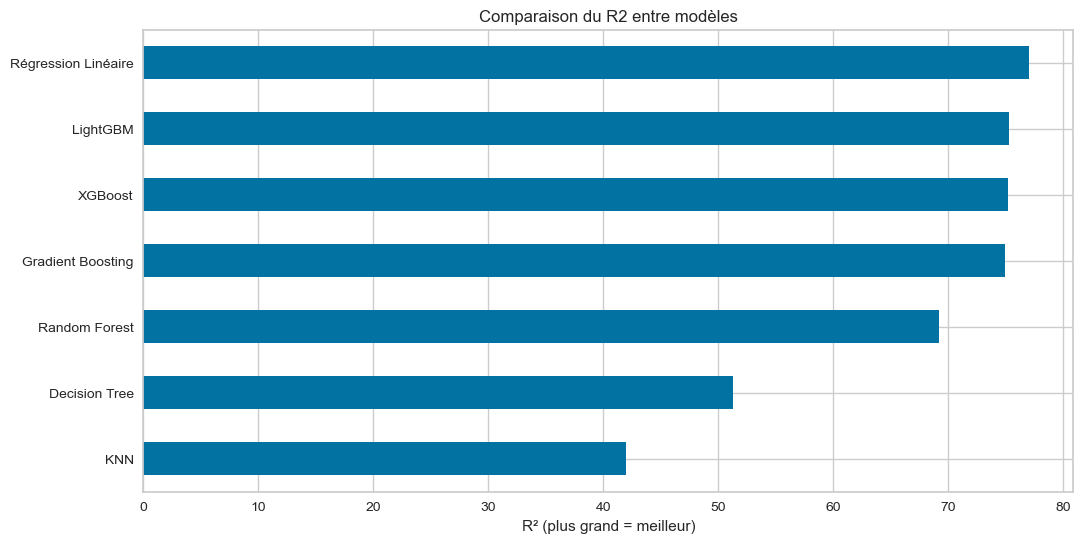

In [75]:
from sklearn import metrics

def evaluate_optimized_model(model_name, grid_search, X_test, y_test):
    """
    Évalue un modèle optimisé et affiche les métriques principales
    
    Args:
        model_name (str): Nom du modèle
        grid_search: Objet GridSearchCV après fitting
        X_test: Features de test
        y_test: Cible de test
    
    Returns:
        dict: Dictionnaire des métriques calculées
    """
    # Prédictions avec le meilleur estimateur
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    # Calcul des métriques
    model_metrics = {
        'MAE': metrics.mean_absolute_error(y_test, y_pred),
        'MAPE': metrics.mean_absolute_percentage_error(y_test, y_pred) * 100,
        'MSE': metrics.mean_squared_error(y_test, y_pred),
        'RMSE': np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
        'R²': metrics.r2_score(y_test, y_pred)*100,
        'Max Error': metrics.max_error(y_test, y_pred),
        'Explained Variance': metrics.explained_variance_score(y_test, y_pred)
    }
    
    # Affichage des résultats
    print(f"\n=== Performance du {model_name} optimisé ===")
    print(f"Meilleurs paramètres: {grid_search.best_params_}")
    
    for metric, value in model_metrics.items():
        print(f"- {metric}: {value:.4f}")
    
    return model_metrics


# Évaluation des modèles optimisés
lr_metrics = evaluate_optimized_model("Régression Linéaire", lr_grid_search, X_test, y_test)
knn_metrics = evaluate_optimized_model("KNN", knn_grid_search, X_test, y_test)
dt_metrics = evaluate_optimized_model("Decision Tree", tree_grid_search, X_test, y_test)
gb_metrics = evaluate_optimized_model("Gradient Boosting", gb_grid_search, X_test, y_test)
xgb_metrics = evaluate_optimized_model("XGBoost", xgb_grid_search, X_test, y_test)
lgbm_metrics = evaluate_optimized_model("LightGBM", lgbm_grid_search, X_test, y_test)
rf_metrics = evaluate_optimized_model("Random Forest", rf_grid_search, X_test, y_test)



# Comparaison globale des modèles
print("\n=== Comparaison des performances ===")
all_metrics = {
    'Régression Linéaire': lr_metrics,
    'KNN': knn_metrics,
    'Decision Tree': dt_metrics,
    'Gradient Boosting': gb_metrics,
    'XGBoost': xgb_metrics,
    'LightGBM': lgbm_metrics,
    'Random Forest':rf_metrics
}

# Création d'un DataFrame pour visualisation
metrics_df = pd.DataFrame(all_metrics).T
print("\nRésumé des métriques (trié par R2):")
print(metrics_df.sort_values('R²'))

# Visualisation graphique
plt.figure(figsize=(12, 6))
metrics_df['R²'].sort_values().plot(kind='barh', title='Comparaison du R2 entre modèles')
plt.xlabel('R² (plus grand = meilleur)')
plt.show()


## Feature importance

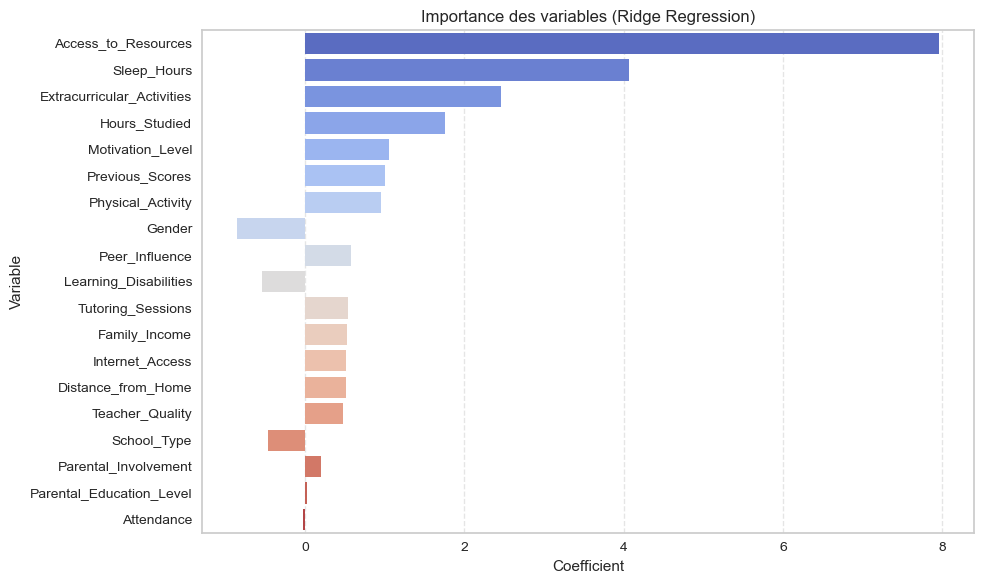

In [78]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Récupération du meilleur modèle Ridge entraîné
best_ridge_model = ridge_grid_search.best_estimator_.named_steps['regressor']

# Récupération des coefficients et noms de variables
ridge_coefficients = best_ridge_model.coef_
feature_names = X_train.columns

# Création d'un DataFrame pour faciliter la visualisation
ridge_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': ridge_coefficients
})

# Tri par importance absolue
ridge_coef_df['abs_coef'] = ridge_coef_df['Coefficient'].abs()
ridge_coef_df = ridge_coef_df.sort_values(by='abs_coef', ascending=False)

# Affichage graphique
plt.figure(figsize=(10, 6))
sns.barplot(data=ridge_coef_df, x='Coefficient', y='Feature', palette='coolwarm')
plt.title("Importance des variables (Ridge Regression)")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### <a  class='anchor'  id="Encoding"></a>[↑](#top)

# <div style="background-color: #007BFF; font-family: 'Gill Sans', sans-serif; font-size: 36px; color: #ffffff; text-align: center; border-radius: 20px; padding: 20px; border: 2px solid #ffffff; box-shadow: 0 4px 10px rgba(0, 0, 0, 0.2);"><b>  6. Conclusion </b></div>


In [ ]:
Le meilleur modèle est la regression ridge